<a href="https://colab.research.google.com/github/JoaquinBarrera/03MAIR---Algoritmos-de-optimizaci-n--2021/blob/main/Joaquin_Barrera_Algoritmos_de_optimizaci%C3%B3n_Trabajo_pr%C3%A1ctico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: Joaquin Guillermo Barrera Barragan  <br>
Url: https://github.com/.../03MAIR---Algoritmos-de-Optimizacion---2019/tree/master/SEMINARIO<br>
Problema:

>3. Combinar cifras y operaciones

Descripción del problema:

El problema consiste en analizar el siguiente problema y diseñar un algoritmo que lo resuelva.

• Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las operaciones fundamentales: suma(+), resta(-), multiplicación(*) y división (/).

• Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad dada. Un ejemplo sería para obtener el 4: 

4+2-6/3*1 = 4






                                        

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plot
import itertools

Una manera de atacar el problema sería crear expresiones aleatorias con las condiciones descritas en el enunciado del problema e intentar que esas expresiones arrojen el número que estamos buscando de manera aleatoria, como se hace a continuación

In [2]:
#Crear listas con los dígitos y operaciones descritas en el problema
digitos = ['1','2','3','4','5','6','7','8','9'] 
operaciones = ['/','*','+','-']

In [3]:
################################################################
# Crea una expresión aleatoria con la forma que indica el problema
################################################################

def crear_expresion():
  e = True                                        #Condición de parada para que el resultado de la expresión sea entero
  while (e):
    expresion = ''
    dig_ex = random.sample(digitos, k = 5)        #Escoje 5 dígitos sin repetición
    op_ex = random.sample(operaciones, k = 4)     #Escoje 4 operaciones sin repetición
    
    for i in range(4):
      expresion = expresion + dig_ex[i] + op_ex[i]   #Junta los dígitos con las operaciones escogidas anteriormente para formar la expresión
    expresion += dig_ex[4]                            #Añade el último dígito a la expresión
    
    if eval(expresion) % 1 == 0:                      #Evalúa si el resultado de la expresión es un entero
        e = False
        
  return(expresion, eval(expresion))

#Ejemplo expresión y resultado aleatorio
crear_expresion()

('3*8/1-6+4', 22.0)

In [4]:
###############################################################################
# BUSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, N):
    
  mejor_solucion = []
  diferencia = 10e100                         #Inicializamos con un valor alto
  cont = 0
  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion, distancia = crear_expresion()         #Genera una solucion aleatoria #Calcula el valor objetivo(distancia total)
    
    if abs(problem - distancia) < diferencia:       #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      diferencia = abs(problem - distancia)         #Actualizar diferencia
      print(solucion,distancia)
    
    if diferencia == 0:            #Se ha encontrado el número deseado
      break
    cont +=1                       #Contar expresiones evaluadas antes de llegar al resultado, si es igual a N es que no se pudo encontrar el número
      
  print("Mejor solución:" , mejor_solucion) 
  print("Distancia     :" , eval(mejor_solucion)) 
  print('Expresiones evaluadas antes de llegar al resultado:', cont)
  return mejor_solucion

    
#Busqueda aleatoria con 5000 iteraciones
solucion = busqueda_aleatoria(70, 5000)

2*6/1-4+3 11.0
9-3+4*8/2 22.0
7-4+8/2*9 39.0
9+5*7-6/3 42.0
5-4+7/1*8 57.0
9*7/1+3-5 61.0
9*7-2+6/3 63.0
8*9/1-7+2 67.0
6/2+9*8-5 70.0
Mejor solución: 6/2+9*8-5
Distancia     : 70.0
Expresiones evaluadas antes de llegar al resultado: 556


También podría hacerse con un ciclo while, pero en este caso el algoritmo no se detiene hasta encontrar el resultado, lo cual hace que varíen mucho los tiempos de finalización.

In [5]:
###########################################################
# Buscar expresión para un valor dado 
###########################################################

def encontrar_valor(n):
  cont = 0
  e = True                                  #Condición de parada 
  while e:
    cont += 1
    expresion, valor = crear_expresion()    #Crear expresión y evaluarla
    if valor == n:                          #Comprobar si la évaluación de la expresión es igual al valor buscado
      return (expresion +' = ' +str(eval(expresion)) + ' Iteraciones realizadas:' + str(cont))
      e = False                             #Finalizar busqueda

#Ejemplo
encontrar_valor(70)

'8*9+5/1-7 = 70.0 Iteraciones realizadas:700'

## - ¿Qué valor mínimo se puede obtener según las condiciones del problema?

Respuesta:

El valor mínimo que se puede obtener según las condiciones del problemas es -69




In [6]:
#######################################################################
# Busqueda valor mínimo
#######################################################################

def busqueda_aleatoria(N):  
  mejor_solucion = []                    
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto
  
  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion, distancia = crear_expresion()         #Genera una expresion aleatoria  #Calcula el valor objetivo(valor mínimo)
    
    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia
      
  print("Expresión del valor mínimo:" , mejor_solucion) 
  print("Valor mínimo:" , mejor_distancia) 
  return mejor_solucion  

#Busqueda aleatoria con 10000 iteraciones    
solucion = busqueda_aleatoria(10000)   

Expresión del valor mínimo: 4/2+1-9*8
Valor mínimo: -69.0


## - ¿Qué valor máximo se puede obtener según las condiciones del problema?

Respuesta:

El valor máximo que se puede obtener según las condiciones del problemas es 77

In [7]:
#######################################################################
# Busqueda valor máximo
#######################################################################

def busqueda_aleatoria(N):  
  mejor_solucion = []
  mejor_distancia = 0                               #Inicializamos con un valor bajo
  
  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion, distancia = crear_expresion()         #Genera una expresión aleatoria  #Calcula el valor objetivo(valor máximo)
    
    if distancia > mejor_distancia:                 #Compara con el máximo obtenido hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia
         
  print("Expresión del valor máximo:" , mejor_solucion) 
  print("Valor máximo:" , mejor_distancia) 
  return mejor_solucion  
    
#Busqueda aleatoria con 10000 iteraciones    
solucion = busqueda_aleatoria(10000)   

Expresión del valor máximo: 7+8*9-4/2
Valor máximo: 77.0


## -¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo ?

Respuesta: 

Si es posible, a continuación vemos un histograma de los resultados al simular y calcular 10000 expresiones, donde vemos que todos los valores enteros entre -69 y 77 aparecieron al menos 1 vez. 

In [8]:
############################################################
# Crear lista con n valores de expresiones aleatorias 
############################################################

def resultados(n):
  lista = []                                  #Lista de valores simulados
  for i in range(n):
    expresion, valor = crear_expresion()      #Crear expresiones y evaluarlas
    lista.append(valor)                       #Guardar los valores de las expresiones creadas anteriormente en una lista
  return(lista)


In [9]:
lista = resultados(10000)
Max = np.max(lista)
Min = np.min(lista)
print('Se calculan los valore máximos y minimos de los resultados')
print('El valor máximo es =' + str(Max), '\n' 'El valor Mínimos es = ' + str(Min))

Se calculan los valore máximos y minimos de los resultados
El valor máximo es =77.0 
El valor Mínimos es = -69.0


Adicionalmente vemos que efectivamente los valores mínimo y máximo son $-69$ y $77$ respectivamente.

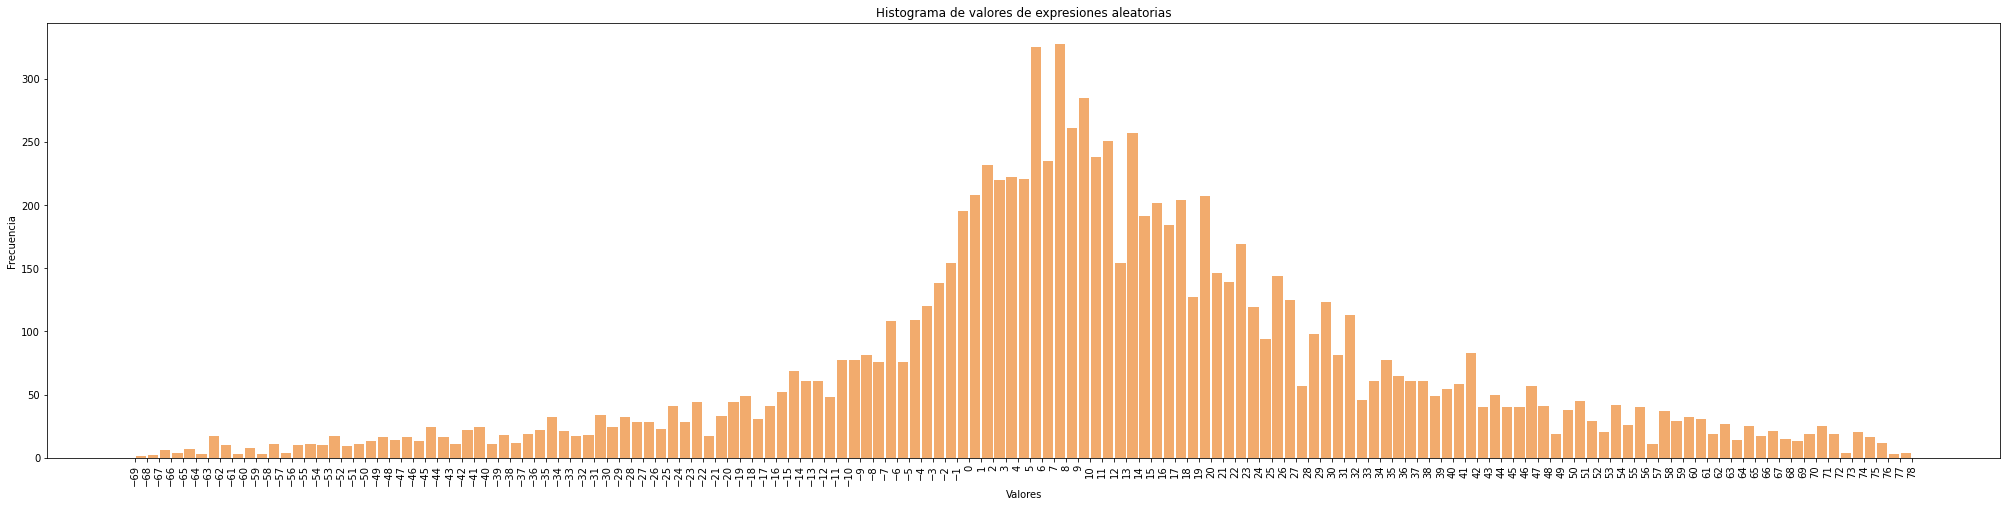

In [10]:
############################################################
# Histograma de valores obtenidos aleatoriamente
############################################################

valores = lista   #Lista valores enteros obtenidos a partir de expresiones aleatorias

intervalos = range(int(min(valores)), int(max(valores)) + 2)  #Calculamos los extremos de los intervalos
plot.figure(figsize=(35,8))
plot.hist(x=valores, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plot.title('Histograma de valores de expresiones aleatorias')
plot.xlabel('Valores')
plot.ylabel('Frecuencia')
plot.xticks(intervalos, rotation=90)


plot.show() #Dibujamos el histograma

## (*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



Respuesta

Si no se toma en cuenta la restricción de no repetir los números o las operaciones, tenemos infinitas posibilidades pues por ejemplo para calcular el número 4 lo podemos hacer de la siguiente manera:
$$4 = 4 * i/i-i+i, i \in \mathbb{Z^+} $$ <bf>
$$4 = 4 - i+i-i+i, i \in \mathbb{Z^+} $$

Donde $i$ es cualquier número entero mayor que $0$, creando un código para comprobarlo tenemos:

In [11]:
def sin_restricciones(x, N):     #x: número que queremos encontrar, N: cualquier entero mayor a 0 
  for i in range(1,N):           
    exp = str(x) +'*'+ str(i) +'/'+ str(i) +'-'+ str(i) +'+'+ str(i)  #Hacer expresión de la forma x*i/i-i+i
    result = eval(exp)                                                #Evaluar expresión
    print(str(exp) +' = '+ str(round(result)))  

#Ejemplo con 10 expresiones, pero pueden ser tantas como se quieran  
sin_restricciones(4,10) 
print('    ...    ')

4*1/1-1+1 = 4
4*2/2-2+2 = 4
4*3/3-3+3 = 4
4*4/4-4+4 = 4
4*5/5-5+5 = 4
4*6/6-6+6 = 4
4*7/7-7+7 = 4
4*8/8-8+8 = 4
4*9/9-9+9 = 4
    ...    


## ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.

Respuesta:

Teniendo en cuenta las restricciones de no repetir cifras ni signos, las posibilidades van a ser finitas y dependeran del número que se esté buscando, sabemos que son finitas pues el número posible de expresiones se puede calcular por medio de la expresión: 
$$9\mathbf{P} 5 * 4 \mathbf{P} 4 = 362880$$
Por lo tanto tenemos $362880$ posibles expresiones diferentes, claramente varias de estas expresiones al evaluarlas tendran los mismos resultados. 

In [12]:
Expresiones = []
Resultados= []
cont = 0

for i in itertools.permutations(digitos, 5):
  for j in itertools.permutations(operaciones, 4):
    exp = str(i[0])+ str(j[0]) + str(i[1]) + str(j[1]) + str(i[2]) + str(j[2]) + str(i[3]) + str(j[3]) + str(i[4])
    Expresiones.append(exp)
    resul = eval(exp)
    #print(str(exp) + '=' + str(resultados))
    cont = cont + 1
    Resultados.append(resul)
print('Total de expresiones:', cont)


Total de expresiones: 362880


Modelo para el espacio de soluciones<br>

## (*) ¿Cuál es la estructura de datos que mejor se adapta al problema? 

Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, argumentalo)


Respuesta

Al ser un problema de busqueda, podemos adaptar el problema a una estructura de árbol, donde al ir añadiendo los simbolos y las cifras, el árbol se va expandiendo. Por lo tanto se pueden utilizar diversas herramientas de busqueda para encontrar las posibles soluciones.

Según el modelo para el espacio de soluciones<br>

(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

Respuesta

Al ser un problema de busqueda, al contrario de un problema de optmización, no se puede hablar de función objetivo, y por lo tanto tampoco se puede decir si es un problema de minimización o máximización. Se trata de buscar un valor, empleando un algoritmo, pero este algoritmo no tiene una función objetivo establecida. 

## Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

Al realizar un algoritmo que resuelva el problema por fuerza bruta, es necesario explorar todas las posibles expresiones, evaluarlas y compararlas con el número buscado, por lo tanto se debe escribir un algoritmo que retorne todas las posibles expresiones.

In [13]:
#Crear listas con los dígitos y operaciones descritas en el problema
#digitos = ['1','2','3','4','5','6','7','8','9'] 
#operaciones = ['/','*','+','-']

In [23]:
def fuerza_b(n):
  Expresiones = []
  Resultados= []

  for i in itertools.permutations(digitos, 5):
    for j in itertools.permutations(operaciones, 4):
      exp = str(i[0])+ str(j[0]) + str(i[1]) + str(j[1]) + str(i[2]) + str(j[2]) + str(i[3]) + str(j[3]) + str(i[4])
      resul = eval(exp)

      if resul == n:
        #print(str(exp) + '=' + str(resul))
        return(str(exp) + '=' + str(resul))  #En caso de querer la primera expresión activar esta linea
   

In [24]:
#Ejemplo: Todas las maneras de obtener 72 por fuerza bruta
fuerza_b(72)

2-6/3+8*9=72.0
2-6/3+9*8=72.0
2+8*9-6/3=72.0
2+9*8-6/3=72.0
3-6/2+8*9=72.0
3-6/2+9*8=72.0
3+8*9-6/2=72.0
3+9*8-6/2=72.0
6/2-3+8*9=72.0
6/2-3+9*8=72.0
6/2+8*9-3=72.0
6/2+9*8-3=72.0
6/3-2+8*9=72.0
6/3-2+9*8=72.0
6/3+8*9-2=72.0
6/3+9*8-2=72.0
8*9+2-6/3=72.0
8*9-2+6/3=72.0
8*9+3-6/2=72.0
8*9-3+6/2=72.0
8*9+6/2-3=72.0
8*9-6/2+3=72.0
8*9+6/3-2=72.0
8*9-6/3+2=72.0
9*8+2-6/3=72.0
9*8-2+6/3=72.0
9*8+3-6/2=72.0
9*8-3+6/2=72.0
9*8+6/2-3=72.0
9*8-6/2+3=72.0
9*8+6/3-2=72.0
9*8-6/3+2=72.0


## Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

Dado que se está utilizando la función *permutations* de la librería *itertools* para permutar tanto las cifras como los signos, una vez escogida una cifra dentro de las $n$ posibilidades, en el siguiente paso puedo escoger $n-1$ cifras lo cual da como resultado $n*(n-1)$ opciones y así sucesivamente hasta completar la expresión, llegando a tener hasta $n!$ opciones, lo mismo pasaría con los signos, lo cual hace que la complejidad del algoritmo sea de  $O(n!)$, más aún, al tener $2$ ciclos *for*, el número de operaciones es bastante grande, pero sigue primando la complejidad $O(n!)$.  

## (*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

Implementando un algoritmo de busqueda, lo que se hará es tener en cuenta si el número buscado es positivo o negativo, según sea el caso, se empezaran las expresiones con los signos $+, *$ o $/,-$ respectivamente y se evaluará la expresión inicial para decidir si continuar o no explorando esta expresión, añadiendole las posibilidades restantes. Así, se realiza una poda a aquellas expresiones que ya no van a arrojar buenos resultados y se continúa con aquellas que pueden dar una buena solución.

In [16]:
#Crear listas con los dígitos y operaciones descritas en el problema
digitos = ['1','2','3','4','5','6','7','8','9'] 
operaciones1 = ['*', '+']
operaciones2 = ['/', '-']

Expresiones = []
Resultados= []
cont = 0

def nueva_busqueda(n):
  if n >= 0:               # Comprobar si el número es positivo
    for i in itertools.permutations(digitos, 5):    #Escoger 5 valores sin repetición
      for j in itertools.permutations(operaciones1, 2):     #Escoger entre los signos + o * 
          exp = str(i[0])+ str(j[0]) + str(i[1]) + str(j[1]) + str(i[2])   #Formar una expresión inicial con 3 cifras y los signos + y * 
          if eval(exp) > n:                                 #Comprobar si la expresión inicial es mayor que el número buscado para continuar con esta expresión, de lo contrario no se explora más 
            for k in itertools.permutations(operaciones2, 2):   #Permutar entre - y /
              exp = exp + str(k[0]) + str(i[3]) + str(k[1]) + str(i[4])   #Añadir los nuevos signos y cifras a la expresión
              if eval(exp) == n:                                          #Comprobar si el resultado de la expresión es igual al número buscado
                #print(str(exp) + '=' + str(round(eval(exp))))            #Imprimir todas las soluciones 
                return(str(exp) + '=' + str(round(eval(exp))))            #Retornar la primera solución encontrada

  else:                                                                   #En caso de que el numero sea negativo se hace un proceso similar pero ahora empezando por los signos - y /.
    for i in itertools.permutations(digitos, 5): 
      for j in itertools.permutations(operaciones2, 2):        
          exp = str(i[0])+ str(j[0]) + str(i[1]) + str(j[1]) + str(i[2]) 
          if eval(exp) > n:                                  #Comprobar si la expresión inicial es mayor que el número buscado para continuar con esta expresión, de lo contrario no se explora más 
            for k in itertools.permutations(operaciones1, 2):
              exp = exp + str(k[0]) + str(i[3]) + str(k[1]) + str(i[4]) 
              if eval(exp) == n:
                #print(str(exp) + '=' + str(round(eval(exp))))             #Imprimir todas las soluciones 
                return(str(exp) + '=' + str(round(eval(exp))))             #Retornar la primera solución encontrada

  

In [17]:
nueva_busqueda(-30)

'1-8/2*9+5=-30'

A continuación podemos ver que tanto con la fuerza bruta como con el nuevo algoritmo se pueden obtener todos los enteros en el rango de $(-69,77)$ aunque claramente en el caso de fuerza bruta el tiempo es mayor al tiempo del nuevo algoritmo. 

In [18]:
#Encontrar números enteros en el rango (-69,77) con fuerza bruta
lista = []
for x in range(-69,78):       #Recorrer el rango deseado
  lista.append(fuerza_b(x))   #Añadir expresión encontrada 

print(len(lista))    #Longitud de lista de expresiones encontradas

147


In [19]:
None in lista  #Comprobar si algún número no se pudo encontrar con el algoritmo 

False

In [20]:
#Encontrar números enteros en el rango (-69,77) con el nuevo algoritmo 
lista = []
for x in range(-69,78):       #Recorrer el rango deseado
  lista.append(nueva_busqueda(x))   #Añadir expresión encontrada 

print(len(lista))    #Longitud de lista de expresiones encontradas

147


In [21]:
None in lista  #Comprobar si algún número no se pudo encontrar con el algoritmo 

False

## (*)Calcula la complejidad del algoritmo 

Respuesta

Al igual que el algoritmo de fuerza bruta, cómo se enunció anteriormente, al estar permutando entre cifras y signos, la complejidad del algoritmo va a ser de $O(n!)$, lo que si se va a reducir es el número de operaciones que se realizan dentro del algoritmo, ya que se están podando ramas, es decir, eliminando expresiones parciales que no van a llevar a la solución pero que con el algoritmo de fuerza bruta si se exploraban hasta el final. 

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

https://docs.python.org/3/library/itertools.html#itertools.permutations

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta

Se pueden implementar otras tecnicas de busqueda o incluso algoritmos geneticos que mejoren las soluciones y reduzcan el número de operaciones ejecutadas